# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1WHWG-8Ol7sWYSrD27b0zEd0MZJV2NYNh -O /content/data

Retrieving folder contents
Processing file 1iqmMh6_9GKXdn-xSEuLkVzAnlqT60EiX cleaned_data.csv
Processing file 1rT8mQlkTyGonDoK2Cy0mBCt_VTmcqXJM reddit_comments_gender_female_processed_phrase_annotated.csv
Processing file 1PI5amr5Bye_irAnHXsUYNHprZg--z6Tx reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv
Processing file 1BJX_fAn6Cr8myZ7gPM3D1jWPortfBxCl reddit_comments_race_black_processed_phrase_annotated.csv
Processing file 1vAdY9gWvPiQWUWMY2HuSkLJKPJ-GExsl reddit_comments_religion1_jews_processed_phrase_annotated.csv
Processing file 1aDmaJhTN9P0Q3pyrefS7P-3k-vo3FSJZ reddit_comments_religion2_muslims_processed_phrase_annotated.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1iqmMh6_9GKXdn-xSEuLkVzAnlqT60EiX
To: /content/data/cleaned_data.csv
100% 3.25M/3.25M [00:00<00:00, 15.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rT8mQlkTyGonDoK2Cy0mBCt_V

Distribution of Bias Categories (Bar Plot, Sorted by Frequency)

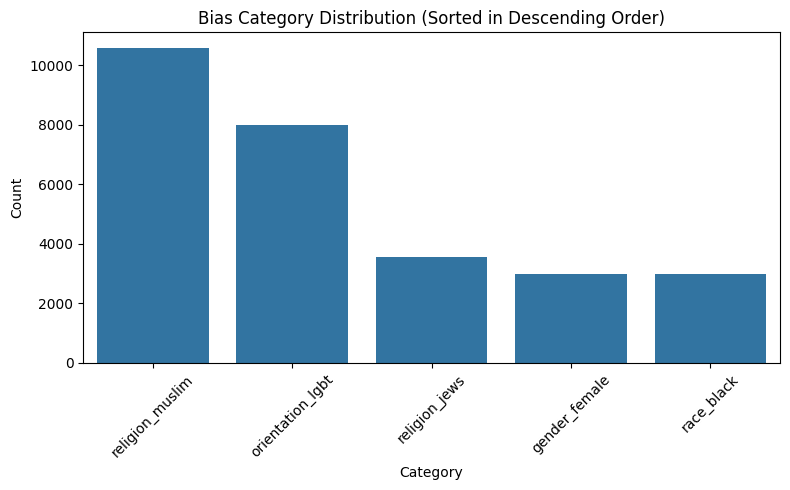

In [ ]:
cleaned_df = pd.read_csv('data/cleaned_data.csv')
plt.figure(figsize=(8, 5))
order = cleaned_df['category'].value_counts().index
sns.countplot(data=cleaned_df, x='category', order=order)
plt.title('Bias Category Distribution (Sorted in Descending Order)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comment Length Distribution by Category (Boxplot)

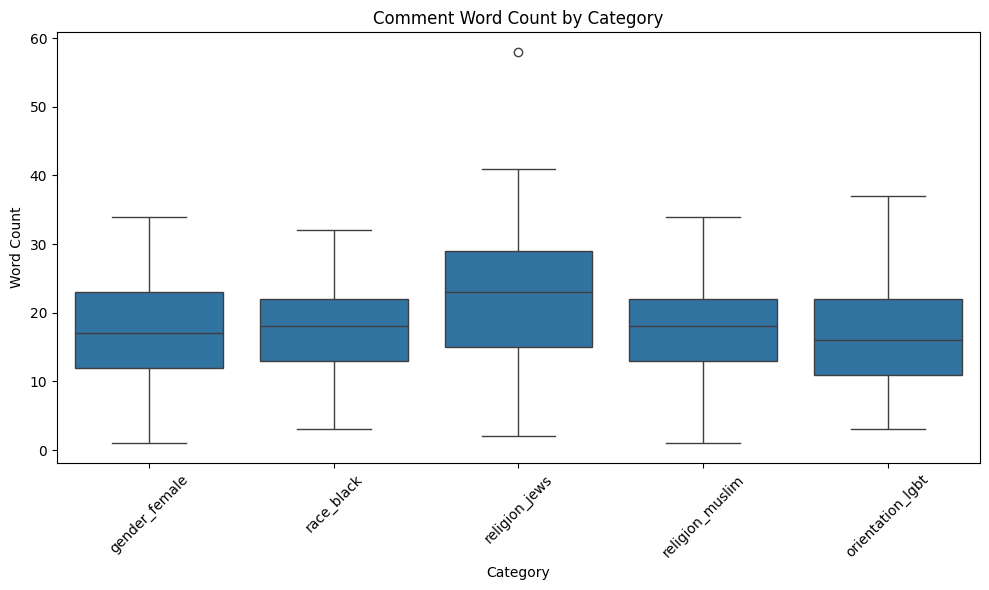

In [ ]:
# Add a column for comment length (number of words)
cleaned_df['comment_word_count'] = cleaned_df['comment'].astype(str).apply(lambda x: len(x.split()))

# Boxplot of comment length by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='category', y='comment_word_count')
plt.title('Comment Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comment Length Distribution by Category (Histogram)

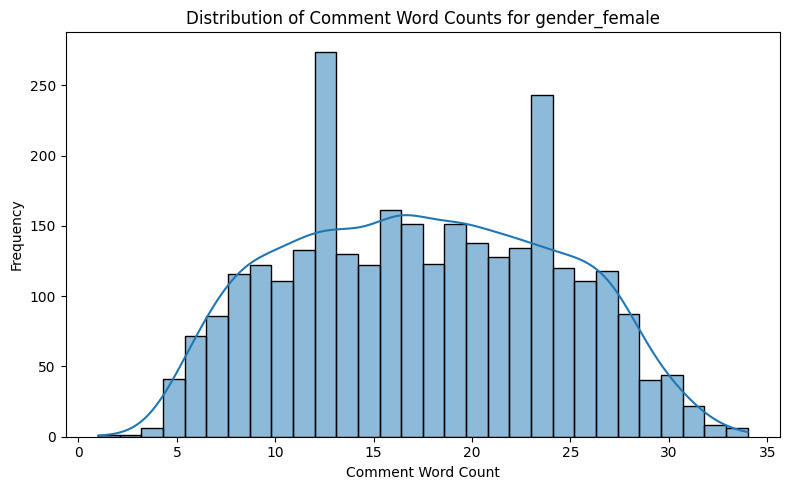

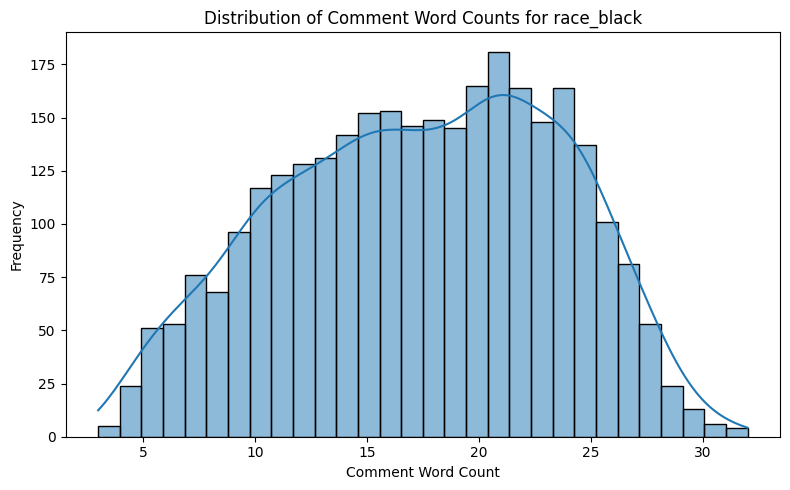

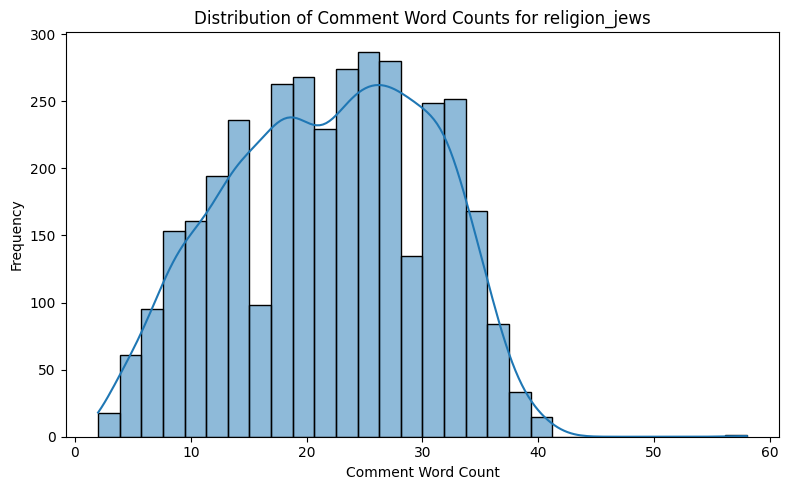

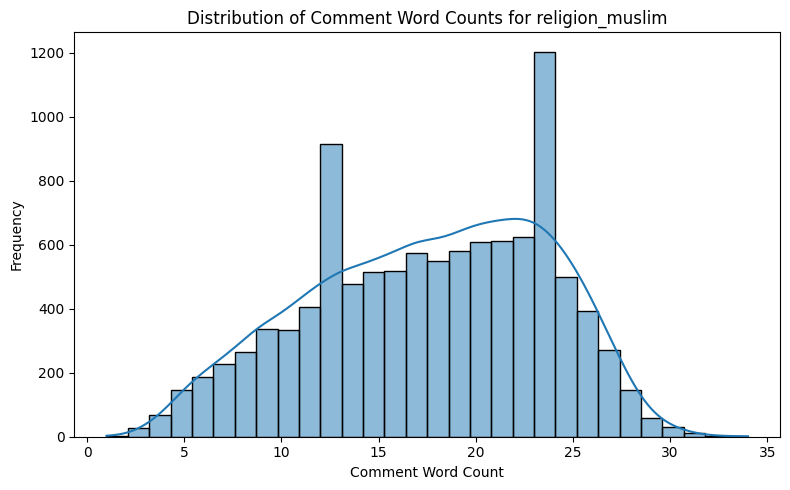

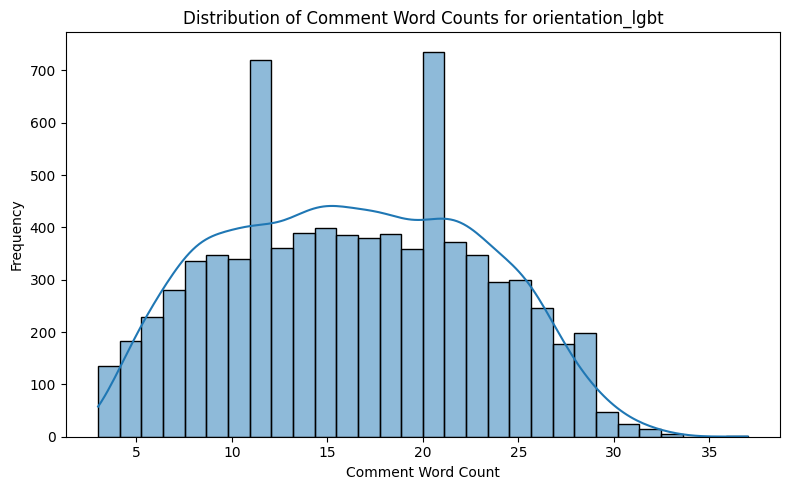

In [ ]:
# Histogram of comment lengths
categories = cleaned_df['category'].unique()
for cat in categories:
    plt.figure(figsize=(8, 5))
    subset = cleaned_df[cleaned_df['category'] == cat]
    sns.histplot(subset['comment_word_count'], bins=30, kde=True)
    plt.title(f'Distribution of Comment Word Counts for {cat}')
    plt.xlabel('Comment Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Tokenization (Outdated)

In [ ]:
# @title
# from pathlib import Path
# import os, pandas as pd
# from datasets import Dataset, load_from_disk
# from transformers import AutoTokenizer
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# PROJECT_ROOT = Path.cwd()
# DATA_IN = PROJECT_ROOT / "data" / "cleaned_data.csv"
# DATA_OUT_DIR = PROJECT_ROOT / "data" / "tokenized_bert_uncased_max128"
# MAX_LEN = 128
# REMOVE_STOPWORDS = False

# assert DATA_IN.exists(), f"Missing file: {DATA_IN}"


# df = pd.read_csv(DATA_IN, usecols=["comment", "bias_sent", "category"]).dropna(subset=["comment","bias_sent"])

# labels_num = pd.to_numeric(df["bias_sent"], errors="coerce")
# mask = labels_num.isin([0, 1])
# dropped = (~mask | labels_num.isna()).sum()
# df = df.loc[mask, ["comment", "category"]].copy()
# df["labels"] = labels_num.loc[mask].astype(int)


# def maybe_remove_stopwords(text: str) -> str:
#     if not REMOVE_STOPWORDS:
#         return str(text)
#     toks = [w for w in str(text).split() if w.lower() not in ENGLISH_STOP_WORDS]
#     return " ".join(toks)

# df["text"] = df["comment"].astype(str).apply(maybe_remove_stopwords)

# print(f"Rows kept: {len(df)} | Dropped (invalid labels): {int(dropped)}")

# # tokenizer
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

# ds = Dataset.from_pandas(df[["text", "labels", "category"]], preserve_index=False)

# def tok(batch):
#     return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_LEN)

# ds = ds.map(tok, batched=True, desc="Tokenizing")

# # keep standard columns
# keep = ["input_ids", "attention_mask", "labels", "category"]
# if "token_type_ids" in ds.column_names:
#     keep.insert(1, "token_type_ids")
# ds = ds.select_columns(keep)


# DATA_OUT_DIR.mkdir(parents=True, exist_ok=True)
# ds.save_to_disk(str(DATA_OUT_DIR))
# print(f"Saved tokenized dataset to: {DATA_OUT_DIR}")


In [ ]:
# @title
# # Reloading the saved dataset from disk to confirm its readable
# # Print a summary object that shows columns and number of rows

# loaded = load_from_disk(str(DATA_OUT_DIR))
# print(loaded)
# row0 = {k: loaded[k][0] for k in ["labels","category"]}
# print("Row 0 label/category:", row0)
# max_len = max(len(ids) for ids in loaded["input_ids"]) if "input_ids" in loaded.column_names else 0
# print("Max seq len:", max_len)

# Data Split (Outdated)

In [ ]:
# # Split the tokenized dataset into train/test/eval with 6:2:2 ratio
# from datasets import load_from_disk, ClassLabel
# import numpy as np

# # Load the tokenized dataset
# tokenized_data = load_from_disk("data/tokenized_bert_uncased_max128")
# print(f"Total samples: {len(tokenized_data)}")

# # Convert labels column to ClassLabel type for stratification
# tokenized_data = tokenized_data.cast_column("labels",
# ClassLabel(names=["0", "1"]))

# # Set random seed for reproducibility
# np.random.seed(42)

# # Create stratified split to maintain category distribution
# from sklearn.model_selection import train_test_split

# # First split: separate train (60%) from temp (40%)
# train_data, temp_data = tokenized_data.train_test_split(
#     test_size=0.4,
#     stratify_by_column='labels',
#     seed=42
# ).values()

# # Second split: divide temp into test (20%) and eval (20%)
# test_data, eval_data = temp_data.train_test_split(
#     test_size=0.5,
#     stratify_by_column='labels',
#     seed=42
# ).values()

# print(f"Train set: {len(train_data)} samples ({len(train_data)/len(tokenized_data)*100:.1f}%)")
# print(f"Test set: {len(test_data)} samples ({len(test_data)/len(tokenized_data)*100:.1f}%)")
# print(f"Eval set: {len(eval_data)} samples ({len(eval_data)/len(tokenized_data)*100:.1f}%)")

# # Save the splits
# train_data.save_to_disk("data/train_split")
# test_data.save_to_disk("data/test_split")
# eval_data.save_to_disk("data/eval_split")

In [ ]:
# import pandas as pd

# def analyze_split(dataset, name):
#     print(f"\n{name} Dataset Analysis:")
#     print(f"Total samples: {len(dataset)}")

#     # Convert to pandas for easier analysis
#     df = dataset.to_pandas()

#     # Label distribution
#     print("\nLabel distribution:")
#     print(df['labels'].value_counts().sort_index())
#     print(f"Bias ratio: {df['labels'].mean():.3f}")

#     # Category distribution
#     print("\nCategory distribution:")
#     print(df['category'].value_counts())

#     return df

# # Analyze each split
# train_df = analyze_split(train_data, "TRAIN")
# test_df = analyze_split(test_data, "TEST")
# eval_df = analyze_split(eval_data, "EVAL")

# # Overall summary
# print(f"\n{'='*50}")
# print("SUMMARY:")
# print(f"Total samples: {len(tokenized_data)}")
# print(f"Train: {len(train_data)} ({len(train_data)/len(tokenized_data)*100:.1f}%)")
# print(f"Test:  {len(test_data)} ({len(test_data)/len(tokenized_data)*100:.1f}%)")
# print(f"Eval:  {len(eval_data)} ({len(eval_data)/len(tokenized_data)*100:.1f}%)")

# Split & Tokenization

In [ ]:
from pathlib import Path
import os, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

PROJECT_ROOT = Path.cwd()
DATA_IN = PROJECT_ROOT / "data" / "cleaned_data.csv"
MAX_LEN = 128
REMOVE_STOPWORDS = False

assert DATA_IN.exists(), f"Missing file: {DATA_IN}"

# --- Load ---
df = pd.read_csv(DATA_IN, usecols=["comment", "bias_sent", "category"]).dropna(subset=["comment","bias_sent"])

# clean labels
labels_num = pd.to_numeric(df["bias_sent"], errors="coerce")
mask = labels_num.isin([0, 1])
dropped = (~mask | labels_num.isna()).sum()
df = df.loc[mask, ["comment", "category"]].copy()
df["labels"] = labels_num.loc[mask].astype(int)

def maybe_remove_stopwords(text: str) -> str:
    if not REMOVE_STOPWORDS:
        return str(text)
    toks = [w for w in str(text).split() if w.lower() not in ENGLISH_STOP_WORDS]
    return " ".join(toks)

df["text"] = df["comment"].astype(str).apply(maybe_remove_stopwords)

print(f"Rows kept: {len(df)} | Dropped (invalid labels): {int(dropped)}")

# --- Split ---
X = df["text"].astype(str)
y = df["labels"]
cat = df["category"]

X_train, X_temp, y_train, y_temp, cat_train, cat_temp = train_test_split(
    X, y, cat, test_size=0.4, stratify=y, random_state=42
)

X_test, X_eval, y_test, y_eval, cat_test, cat_eval = train_test_split(
    X_temp, y_temp, cat_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}, Eval: {len(X_eval)}")

Rows kept: 11492 | Dropped (invalid labels): 47
Train: 6895, Test: 2298, Eval: 2299


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

def tokenize_texts(X, y, cat):
    df_split = pd.DataFrame({"text": X, "labels": y, "category": cat})
    ds = Dataset.from_pandas(df_split, preserve_index=False)
    ds = ds.map(lambda batch: tokenizer(batch["text"],
                                        padding="max_length",
                                        truncation=True,
                                        max_length=MAX_LEN),
                batched=True,
                desc="Tokenizing")
    # keep only relevant columns
    keep = ["input_ids", "attention_mask", "labels", "category"]
    if "token_type_ids" in ds.column_names:
        keep.insert(1, "token_type_ids")
    return ds.select_columns(keep)

train_ds = tokenize_texts(X_train, y_train, cat_train)
test_ds = tokenize_texts(X_test, y_test, cat_test)
eval_ds = tokenize_texts(X_eval, y_eval, cat_eval)

print(train_ds)
print(test_ds)
print(eval_ds)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokenizing:   0%|          | 0/6895 [00:00<?, ? examples/s]

Tokenizing:   0%|          | 0/2298 [00:00<?, ? examples/s]

Tokenizing:   0%|          | 0/2299 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'category'],
    num_rows: 6895
})
Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'category'],
    num_rows: 2298
})
Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'category'],
    num_rows: 2299
})


# Creating Dataset & Train with Default Parameters

In [ ]:
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import itertools

# --- Model ---
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# --- Metrics ---
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels)["f1"],
    }

In [ ]:
# --- Training Arguments ---
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",     # evaluate every epoch
    save_strategy="epoch",           # save checkpoints each epoch
    learning_rate=2e-5,              # common range: 1e-5 to 5e-5
    per_device_train_batch_size=16,  # adjust based on Colab GPU memory
    per_device_eval_batch_size=16,
    num_train_epochs=3,              # tune: 2–4 is typical
    weight_decay=0.01,
    warmup_steps=100,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# --- Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    # Pass the optimizer with fused=False
    optimizers=(torch.optim.AdamW(model.parameters(), lr=training_args.learning_rate, fused=False), None)
)

# Ensure the model is on a supported device (e.g., 'cuda' if available, otherwise 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# --- Fine-tune ---
trainer.train()

# --- Final Evaluation ---
print("=== EVAL on test set ===")
metrics_test = trainer.evaluate(test_ds)
print(metrics_test)

print("=== EVAL on held-out eval set ===")
metrics_eval = trainer.evaluate(eval_ds)
print(metrics_eval)

/tmp/ipython-input-495978105.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.516400,0.460222,0.786771,0.807692
2,0.354000,0.454884,0.804178,0.831461
3,0.206500,0.526504,0.809399,0.836323


=== EVAL on test set ===


{'eval_loss': 0.5265042185783386, 'eval_accuracy': 0.8093994778067886, 'eval_f1': 0.8363228699551569, 'eval_runtime': 16.6497, 'eval_samples_per_second': 138.02, 'eval_steps_per_second': 8.649, 'epoch': 3.0}
=== EVAL on held-out eval set ===
{'eval_loss': 0.5104278326034546, 'eval_accuracy': 0.8099173553719008, 'eval_f1': 0.8360225140712946, 'eval_runtime': 17.4077, 'eval_samples_per_second': 132.068, 'eval_steps_per_second': 8.272, 'epoch': 3.0}


In [ ]:
def evaluate_by_category(ds, category_col):
    results = {}
    for cat in ds.unique(category_col):
        subset = ds.filter(lambda x: x[category_col] == cat)
        metrics = trainer.evaluate(subset)
        results[cat] = metrics
    return results

category_bias_metrics = evaluate_by_category(eval_ds, "category")
for cat, m in category_bias_metrics.items():
    print(f"{cat}: Accuracy={m['eval_accuracy']:.3f}, F1={m['eval_f1']:.3f}")

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

religion_muslim: Accuracy=0.756, F1=0.809
religion_jews: Accuracy=0.738, F1=0.738
race_black: Accuracy=0.850, F1=0.841
orientation_lgbt: Accuracy=0.850, F1=0.869
gender_female: Accuracy=0.831, F1=0.880


Interpretation
| Category         | Accuracy | F1 Score | Interpretation                                                                                                                            |
| ---------------- | -------- | -------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| religion_muslim  | 0.764    | 0.814    | Model is moderately good at detecting bias for Muslim-related comments; slightly lower than other categories.                             |
| religion_jews    | 0.743    | 0.746    | Model struggles the most here; performance is lower than for other categories. Could indicate fewer training samples or more subtle bias. |
| race_black       | 0.837    | 0.830    | Model does well detecting bias related to Black race; high accuracy and F1.                                                               |
| orientation_lgbt | 0.840    | 0.862    | Strong performance; F1 > accuracy indicates good detection of minority class (biased comments).                                           |
| gender_female    | 0.834    | 0.884    | Very good F1; model detects biased comments against females well, slightly better than accuracy implies.                                  |


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import warnings
# Suppress a common sklearn warning when passing target_names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# 1. Get predictions on the held-out evaluation set
# This step uses the 'trainer' object defined in the previous cell
predictions = trainer.predict(eval_ds)
logits = predictions.predictions
labels = predictions.label_ids

# 2. Convert logits to class predictions (0 or 1)
preds = np.argmax(logits, axis=-1)

# --- Overall Evaluation ---
print("\n" + "="*50)
print("OVERALL CLASSIFICATION REPORT (Held-Out Eval Set)")
print("="*50)

# Output the classification report
# Class 1 is the positive class (Biased)
print(classification_report(labels, preds, target_names=['Unbiased (0)', 'Biased (1)']))

# Output the Confusion Matrix
cm = confusion_matrix(labels, preds)
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
print("               Predicted: 0 (Unbiased) | Predicted: 1 (Biased)")
print(f"Actual: 0 (Unbiased) | {cm[0][0]:<20} | {cm[0][1]}")
print(f"Actual: 1 (Biased)   | {cm[1][0]:<20} | {cm[1][1]}")



OVERALL CLASSIFICATION REPORT (Held-Out Eval Set)
              precision    recall  f1-score   support

Unbiased (0)       0.78      0.76      0.77       980
  Biased (1)       0.83      0.84      0.84      1319

    accuracy                           0.81      2299
   macro avg       0.81      0.80      0.80      2299
weighted avg       0.81      0.81      0.81      2299


CONFUSION MATRIX
               Predicted: 0 (Unbiased) | Predicted: 1 (Biased)
Actual: 0 (Unbiased) | 748                  | 232
Actual: 1 (Biased)   | 205                  | 1114


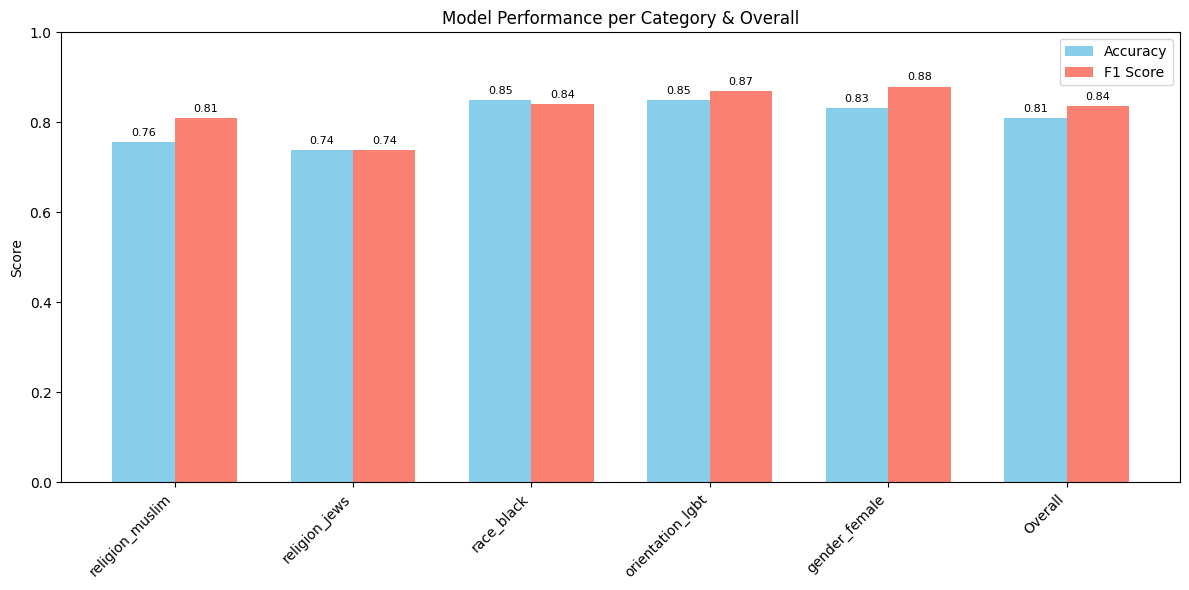

In [ ]:
overall_metrics = metrics_eval
overall_acc = overall_metrics['eval_accuracy']
overall_f1 = overall_metrics['eval_f1']

categories = list(category_bias_metrics.keys()) + ['Overall']
accuracies = [category_bias_metrics[cat]['eval_accuracy'] for cat in category_bias_metrics] + [overall_acc]
f1_scores = [category_bias_metrics[cat]['eval_f1'] for cat in category_bias_metrics] + [overall_f1]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Performance per Category & Overall')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend()

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Finetuning

In [ ]:
results = []

# --- Grid for LR = 1e-5 ---

learning_rate = 1e-5
batch_sizes = [8, 16, 32]
epochs = [3, 4]

grid = list(itertools.product(batch_sizes, epochs))

for bs, ep in grid:
    print(f"\n===== Training with LR={learning_rate}, BatchSize={bs}, Epochs={ep} =====")

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    training_args = TrainingArguments(
        output_dir=f"./results/lr{learning_rate}_bs{bs}_ep{ep}",
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=learning_rate,
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs,
        num_train_epochs=ep,
        weight_decay=0.01,
        warmup_ratio=0.1,
        logging_dir="./logs",
        logging_steps=100,
        report_to="none",
        load_best_model_at_end=False,
        metric_for_best_model="f1",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=eval_ds,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    metrics = trainer.evaluate(eval_ds)
    results.append({
        "learning_rate": learning_rate,
        "batch_size": bs,
        "epochs": ep,
        "accuracy": metrics["eval_accuracy"],
        "f1": metrics["eval_f1"],
    })

df_results = pd.DataFrame(results)
print(df_results)


===== Training with LR=1e-05, BatchSize=8, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.535900,0.469049,0.785994,0.814340
2,0.403500,0.485461,0.796868,0.827866
3,0.301600,0.534340,0.798173,0.827765



===== Training with LR=1e-05, BatchSize=8, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.540800,0.485672,0.772945,0.802721
2,0.416300,0.491040,0.788604,0.820929
3,0.323800,0.608880,0.799478,0.826887
4,0.250400,0.730498,0.797738,0.827073



===== Training with LR=1e-05, BatchSize=16, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.516900,0.505503,0.758591,0.804371
2,0.408400,0.480896,0.784689,0.819935
3,0.353800,0.486634,0.791649,0.822395



===== Training with LR=1e-05, BatchSize=16, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.532400,0.512310,0.757721,0.805449
2,0.415400,0.471902,0.788169,0.818487
3,0.349600,0.492007,0.784254,0.811693
4,0.259600,0.529083,0.787734,0.816954



===== Training with LR=1e-05, BatchSize=32, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.555100,0.522631,0.747281,0.799448
2,0.452500,0.488008,0.774685,0.808432
3,0.403000,0.485663,0.775555,0.810155



===== Training with LR=1e-05, BatchSize=32, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1402643063.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.576600,0.546164,0.745107,0.793952
2,0.467100,0.483941,0.778599,0.803551
3,0.396500,0.477897,0.788169,0.814335
4,0.363700,0.485377,0.788169,0.815879


   learning_rate  batch_size  epochs  accuracy        f1
0        0.00001           8       3  0.798173  0.827765
1        0.00001           8       4  0.797738  0.827073
2        0.00001          16       3  0.791649  0.822395
3        0.00001          16       4  0.787734  0.816954
4        0.00001          32       3  0.775555  0.810155
5        0.00001          32       4  0.788169  0.815879


In [ ]:
results = []

# --- Grid for LR = 2e-5 ---
learning_rate = 2e-5
batch_sizes = [8, 16, 32]
epochs = [3, 4]

grid = list(itertools.product(batch_sizes, epochs))

for bs, ep in grid:
    print(f"\n===== Training with LR={learning_rate}, BatchSize={bs}, Epochs={ep} =====")

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    training_args = TrainingArguments(
        output_dir=f"./results/lr{learning_rate}_bs{bs}_ep{ep}",
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=learning_rate,
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs,
        num_train_epochs=ep,
        weight_decay=0.01,
        warmup_ratio=0.1,
        logging_dir="./logs",
        logging_steps=100,
        report_to="none",
        load_best_model_at_end=False,
        metric_for_best_model="f1",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=eval_ds,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    metrics = trainer.evaluate(eval_ds)
    results.append({
        "learning_rate": learning_rate,
        "batch_size": bs,
        "epochs": ep,
        "accuracy": metrics["eval_accuracy"],
        "f1": metrics["eval_f1"],
    })

df_results = pd.DataFrame(results)
print(df_results)


===== Training with LR=2e-05, BatchSize=8, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.530700,0.440630,0.804263,0.831964
2,0.351800,0.496351,0.805568,0.835963
3,0.217600,0.701222,0.814702,0.840330



===== Training with LR=2e-05, BatchSize=8, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.533100,0.467809,0.790344,0.818797
2,0.359200,0.511438,0.803828,0.829876
3,0.223100,0.825599,0.802958,0.835093
4,0.122400,0.922443,0.803393,0.831720



===== Training with LR=2e-05, BatchSize=16, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.484700,0.458437,0.787734,0.816541
2,0.347400,0.463339,0.803393,0.835277
3,0.247700,0.523003,0.806003,0.834570



===== Training with LR=2e-05, BatchSize=16, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.486500,0.458445,0.787299,0.807859
2,0.349400,0.445876,0.807742,0.836659
3,0.226300,0.604557,0.812962,0.840267
4,0.110500,0.709324,0.810787,0.837262



===== Training with LR=2e-05, BatchSize=32, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.523500,0.488391,0.767725,0.814712
2,0.395800,0.464020,0.797303,0.829429
3,0.313900,0.472113,0.798608,0.825743



===== Training with LR=2e-05, BatchSize=32, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2466616491.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.536900,0.500716,0.763810,0.799853
2,0.406100,0.456431,0.787299,0.815541
3,0.303800,0.487288,0.794693,0.820669
4,0.231700,0.539260,0.793388,0.820687


   learning_rate  batch_size  epochs  accuracy        f1
0        0.00002           8       3  0.814702  0.840330
1        0.00002           8       4  0.803393  0.831720
2        0.00002          16       3  0.806003  0.834570
3        0.00002          16       4  0.810787  0.837262
4        0.00002          32       3  0.798608  0.825743
5        0.00002          32       4  0.793388  0.820687


In [ ]:
results = []

# --- Grid for LR = 3e-5 ---
learning_rate = 3e-5
batch_sizes = [8, 16, 32]
epochs = [3, 4]

grid = list(itertools.product(batch_sizes, epochs))

for bs, ep in grid:
    print(f"\n===== Training with LR={learning_rate}, BatchSize={bs}, Epochs={ep} =====")

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

    training_args = TrainingArguments(
        output_dir=f"./results/lr{learning_rate}_bs{bs}_ep{ep}",
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=learning_rate,
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs,
        num_train_epochs=ep,
        weight_decay=0.01,
        warmup_ratio=0.1,
        logging_dir="./logs",
        logging_steps=100,
        report_to="none",
        load_best_model_at_end=False,
        metric_for_best_model="f1",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=eval_ds,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    metrics = trainer.evaluate(eval_ds)
    results.append({
        "learning_rate": learning_rate,
        "batch_size": bs,
        "epochs": ep,
        "accuracy": metrics["eval_accuracy"],
        "f1": metrics["eval_f1"],
    })

df_results = pd.DataFrame(results)
print(df_results)


===== Training with LR=3e-05, BatchSize=8, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.519200,0.453167,0.789909,0.812863
2,0.357200,0.530560,0.814702,0.845428
3,0.145600,0.729110,0.824706,0.849795



===== Training with LR=3e-05, BatchSize=8, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.532500,0.448015,0.798173,0.827765
2,0.357400,0.555854,0.809482,0.833839
3,0.180700,0.874914,0.807308,0.824693
4,0.108000,1.027839,0.807308,0.834393



===== Training with LR=3e-05, BatchSize=16, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.487100,0.448922,0.795563,0.821970
2,0.329800,0.455008,0.811222,0.840206
3,0.209500,0.573164,0.822532,0.848665



===== Training with LR=3e-05, BatchSize=16, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.486500,0.470705,0.775120,0.788548
2,0.355100,0.483229,0.803393,0.833946
3,0.205200,0.658715,0.817312,0.843400
4,0.099400,0.806849,0.814702,0.839245



===== Training with LR=3e-05, BatchSize=32, Epochs=3 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.506300,0.463519,0.781644,0.819813
2,0.356200,0.448690,0.809917,0.840453
3,0.229200,0.503741,0.809917,0.836023



===== Training with LR=3e-05, BatchSize=32, Epochs=4 =====


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2810522724.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.518100,0.473994,0.777294,0.814224
2,0.386700,0.437857,0.803828,0.831149
3,0.240600,0.505074,0.815572,0.840482
4,0.136900,0.607065,0.811657,0.837888


   learning_rate  batch_size  epochs  accuracy        f1
0        0.00003           8       3  0.824706  0.849795
1        0.00003           8       4  0.807308  0.834393
2        0.00003          16       3  0.822532  0.848665
3        0.00003          16       4  0.814702  0.839245
4        0.00003          32       3  0.809917  0.836023
5        0.00003          32       4  0.811657  0.837888


Best model (based on F1 score across all tested learning rates, batch sizes, and epochs):
* learning_rate = 0.00003
* batch_size = 8
* epochs = 3
* accuracy = 0.824706
* f1 = 0.849795

In [ ]:
# --- Find the Best Combination ---
best_f1 = df_results.loc[df_results["f1"].idxmax()]
print("\nBest (F1):")
print(best_f1)

best_acc = df_results.loc[df_results["accuracy"].idxmax()]
print("\nBest (Accuracy):")
print(best_acc)



Best (F1):
learning_rate    0.000030
batch_size       8.000000
epochs           3.000000
accuracy         0.824706
f1               0.849795
Name: 0, dtype: float64

Best (Accuracy):
learning_rate    0.000030
batch_size       8.000000
epochs           3.000000
accuracy         0.824706
f1               0.849795
Name: 0, dtype: float64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1359717618.py:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_finetuned = Trainer(


Retraining best model with LR=3e-05, BatchSize=8, Epochs=3


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.532700,0.463490,0.795998,0.814404
2,0.368600,0.499634,0.810352,0.840410
3,0.231200,0.713727,0.819487,0.844161



OVERALL CLASSIFICATION REPORT (Finetuned Model on Held-Out Eval Set)


              precision    recall  f1-score   support

Unbiased (0)       0.80      0.78      0.79       980
  Biased (1)       0.84      0.85      0.84      1319

    accuracy                           0.82      2299
   macro avg       0.82      0.81      0.81      2299
weighted avg       0.82      0.82      0.82      2299


CONFUSION MATRIX (Finetuned Model)
               Predicted: 0 (Unbiased) | Predicted: 1 (Biased)
Actual: 0 (Unbiased) | 760                  | 220
Actual: 1 (Biased)   | 195                  | 1124

PER-CATEGORY EVALUATION (Finetuned Model on Held-Out Eval Set)


Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2299 [00:00<?, ? examples/s]

religion_muslim: Accuracy=0.792, F1=0.836
religion_jews: Accuracy=0.762, F1=0.758
race_black: Accuracy=0.820, F1=0.815
orientation_lgbt: Accuracy=0.852, F1=0.867
gender_female: Accuracy=0.854, F1=0.897


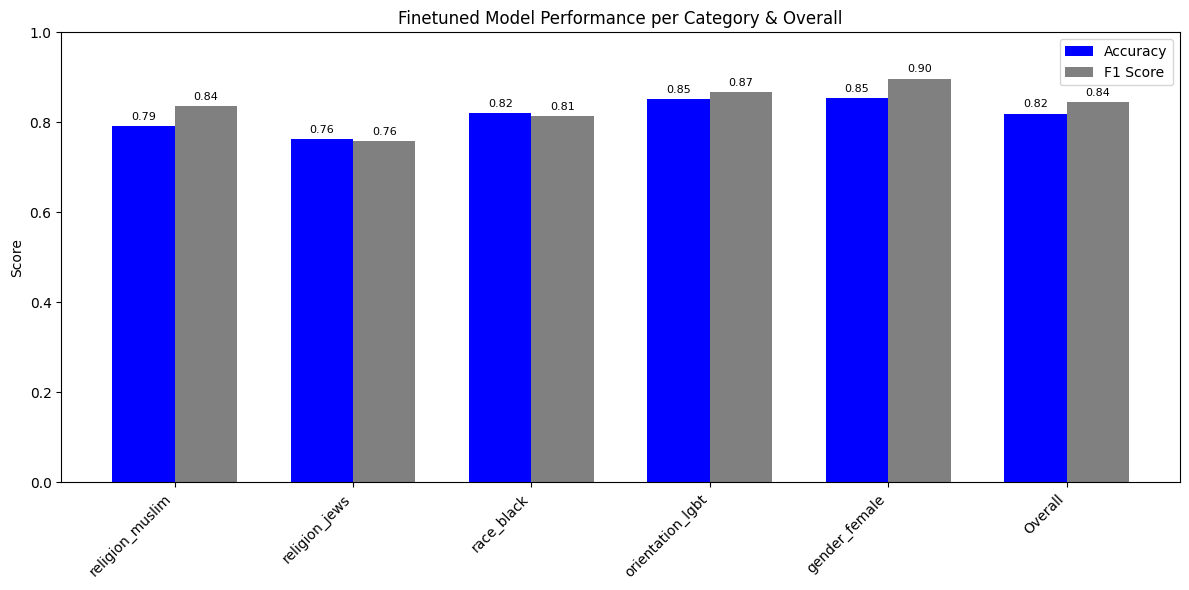

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import warnings
# Suppress a common sklearn warning when passing target_names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the best finetuned model
best_lr = best_f1['learning_rate']
best_bs = int(best_f1['batch_size'])
best_ep = int(best_f1['epochs'])


# Re-initialize the model with the best parameters
model_finetuned = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments for the best model (used only to initialize the Trainer for evaluation)
training_args_finetuned = TrainingArguments(
    output_dir="./results_best_model", # Dummy output dir
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=best_lr,
    per_device_train_batch_size=best_bs,
    per_device_eval_batch_size=best_bs,
    num_train_epochs=best_ep,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_dir="./logs_best_model",
    logging_steps=100,
    report_to="none",
    load_best_model_at_end=False, # We are loading manually or re-training for demo
    metric_for_best_model="f1",
)

# Initialize a new Trainer for the finetuned model for evaluation purposes
trainer_finetuned = Trainer(
    model=model_finetuned,
    args=training_args_finetuned,
    train_dataset=train_ds, # Use train_ds for training
    eval_dataset=eval_ds,   # Use eval_ds for evaluation
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    optimizers=(torch.optim.AdamW(model_finetuned.parameters(), lr=training_args_finetuned.learning_rate, fused=False), None)
)

# Train the model with the best parameters to get its trained state
print(f"Retraining best model with LR={best_lr}, BatchSize={best_bs}, Epochs={best_ep}")
trainer_finetuned.train()

# --- Evaluate the finetuned model ---

# Overall Evaluation
print("\n" + "="*50)
print("OVERALL CLASSIFICATION REPORT (Finetuned Model on Held-Out Eval Set)")
print("="*50)

predictions_finetuned = trainer_finetuned.predict(eval_ds)
logits_finetuned = predictions_finetuned.predictions
labels_finetuned = predictions_finetuned.label_ids
preds_finetuned = np.argmax(logits_finetuned, axis=-1)

print(classification_report(labels_finetuned, preds_finetuned, target_names=['Unbiased (0)', 'Biased (1)']))

cm_finetuned = confusion_matrix(labels_finetuned, preds_finetuned)
print("\n" + "="*50)
print("CONFUSION MATRIX (Finetuned Model)")
print("="*50)
print("               Predicted: 0 (Unbiased) | Predicted: 1 (Biased)")
print(f"Actual: 0 (Unbiased) | {cm_finetuned[0][0]:<20} | {cm_finetuned[0][1]}")
print(f"Actual: 1 (Biased)   | {cm_finetuned[1][0]:<20} | {cm_finetuned[1][1]}")

# Per-Category Evaluation for the finetuned model
def evaluate_by_category_finetuned(ds, category_col, trainer):
    results = {}
    for cat in ds.unique(category_col):
        subset = ds.filter(lambda x: x[category_col] == cat)
        metrics = trainer.evaluate(subset)
        results[cat] = metrics
    return results

print("\n" + "="*50)
print("PER-CATEGORY EVALUATION (Finetuned Model on Held-Out Eval Set)")
print("="*50)
category_bias_metrics_finetuned = evaluate_by_category_finetuned(eval_ds, "category", trainer_finetuned)
for cat, m in category_bias_metrics_finetuned.items():
    print(f"{cat}: Accuracy={m['eval_accuracy']:.3f}, F1={m['eval_f1']:.3f}")


# --- Plotting ---

overall_metrics_finetuned = trainer_finetuned.evaluate(eval_ds) # Re-evaluate overall for consistency
overall_acc_finetuned = overall_metrics_finetuned['eval_accuracy']
overall_f1_finetuned = overall_metrics_finetuned['eval_f1']

categories = list(category_bias_metrics_finetuned.keys()) + ['Overall']
accuracies = [category_bias_metrics_finetuned[cat]['eval_accuracy'] for cat in category_bias_metrics_finetuned] + [overall_acc_finetuned]
f1_scores = [category_bias_metrics_finetuned[cat]['eval_f1'] for cat in category_bias_metrics_finetuned] + [overall_f1_finetuned]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='blue')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='grey')

ax.set_ylabel('Score')
ax.set_title('Finetuned Model Performance per Category & Overall')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend()

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()